In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import string
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

time: 213 µs (started: 2022-05-18 15:43:50 +05:30)


In [2]:
#Reading the test data
Test_data = pd.read_csv("test_file.csv")
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,...,7956,499,0,5990,1950,7956,499,0,5990,0
8997,24002,60000,1,2,2,26,0,0,0,0,...,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120
8998,17019,70000,2,2,2,23,0,0,0,0,...,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700


time: 35.6 ms (started: 2022-05-18 15:43:50 +05:30)


In [3]:
#Reading the train data
Train_data = pd.read_csv("train_file.csv")
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


time: 73.3 ms (started: 2022-05-18 15:43:51 +05:30)


In [4]:
#Shape of the test Data & train Data
print(" Shape of Test data: ",Test_data.shape)
print(" Shape of Train data: ",Train_data.shape)

 Shape of Test data:  (9000, 24)
 Shape of Train data:  (21000, 25)
time: 1.43 ms (started: 2022-05-18 15:43:51 +05:30)


In [5]:
#Describing the Train data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


time: 91.9 ms (started: 2022-05-18 15:43:52 +05:30)


In [6]:
#Unique length of the labels in EDUCATION & MARRIAGE column before merging labels
print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
print(" Train data unique values for MARRIAGE column:: ", Train_data['MARRIAGE'].unique())
print(" Train data unique values for MARRIAGE column: ", Test_data['MARRIAGE'].unique())

 Train data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Test data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Train data unique values for MARRIAGE column::  [2 1 3 0]
 Train data unique values for MARRIAGE column:  [1 2 3 0]
time: 4.91 ms (started: 2022-05-18 15:43:52 +05:30)


In [7]:
def merging_labels():
    
    """
    input: takes original labels from the data

    output: merges unwanted or similar labels into one label in the data
    
    """
    #Merging unknown and others label of education column into one label from Train data & Test data
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 5, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 6, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 0, 4, Train_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 5, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 6, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 0, 4, Test_data['EDUCATION'])
    
    #Merging divorced and others label of MARRIAGE column into one label from Train data and Test data
    #Train_data['MARRIAGE']=np.where(Train_data['MARRIAGE'] == 0, Train_data['MARRIAGE'] )
    #Test_data['MARRIAGE']=np.where(Test_data['MARRIAGE'] == 0,  Test_data['MARRIAGE'])
    
    
    # After merging, the Unique length of the test Data
    print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
    print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
    #print(" Train data unique values for MARRIAGE column: ",Train_data['MARRIAGE'].unique())
    #print(" Test data unique values for MARRIAGE column: ",Test_data['MARRIAGE'].unique())

time: 3.44 ms (started: 2022-05-18 15:43:52 +05:30)


In [8]:
merging_labels()

 Train data unique values for EDUCATION column:  [2 1 3 4]
 Test data unique values for EDUCATION column:  [2 1 3 4]
time: 12.2 ms (started: 2022-05-18 15:43:52 +05:30)


### Merging all monthwise columns of Repayment status & Amount of bill statement columns into one column

In [9]:
#Creating single colum of Repayment status(all months) by finding avg of the columns
Train_data['PAY'] = Train_data.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
Train_data = Train_data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY
0,25150,360000,2,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,-1.000000
1,13470,240000,2,1,2,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.000000
2,3092,320000,2,2,1,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0.000000
3,13973,50000,2,2,2,24,2675,0,0,0,0,0,0,0,0,0,0,0,1,-1.666667
4,10567,80000,1,3,1,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.500000
20996,25589,80000,2,2,1,37,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,0.000000
20997,4378,100000,1,1,1,52,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,1.166667
20998,8604,90000,2,2,1,47,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,0.000000


time: 26.1 ms (started: 2022-05-18 15:43:53 +05:30)


In [10]:
#Creating single colum of Repayment status(all months) by finding avg of the columns
Test_data['PAY'] = Test_data.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
Test_data = Test_data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY
0,10178,60000,2,2,1,30,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205,0.000000
1,5304,200000,2,1,2,29,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050,0.333333
2,5187,230000,1,1,2,39,38395,39943,20650,0,0,0,2500,2000,0,0,0,0,-0.666667
3,14495,150000,1,1,2,40,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200,0.000000
4,20444,140000,1,2,2,27,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,3210,0,0,0,0,0,0,0,0,0,0,0,-1.666667
8996,17210,90000,2,1,2,28,2780,1950,7956,499,0,5990,1950,7956,499,0,5990,0,-1.000000
8997,24002,60000,1,2,2,26,58072,59040,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120,0.000000
8998,17019,70000,2,2,2,23,44830,46185,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700,0.000000


time: 24 ms (started: 2022-05-18 15:43:53 +05:30)


In [11]:
#Creating single colum of Amount of bill statement(all months) by finding avg of the columns
Test_data['BILL_AMT'] = Test_data.loc[:,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
Test_data = Test_data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY,BILL_AMT
0,10178,60000,2,2,1,30,1628,1618,1375,1403,1520,1205,0.000000,38068.500000
1,5304,200000,2,1,2,29,4160,14593,20150,0,5739,12050,0.333333,59440.333333
2,5187,230000,1,1,2,39,2500,2000,0,0,0,0,-0.666667,16498.000000
3,14495,150000,1,1,2,40,5800,5245,5200,5200,6500,7200,0.000000,146072.166667
4,20444,140000,1,2,2,27,10000,10000,3393,3260,5000,3000,0.000000,77156.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,0,0,0,0,0,0,-1.666667,535.000000
8996,17210,90000,2,1,2,28,1950,7956,499,0,5990,0,-1.000000,3195.833333
8997,24002,60000,1,2,2,26,2282,2324,2049,2000,3000,1120,0.000000,47678.166667
8998,17019,70000,2,2,2,23,2100,2079,2500,2000,2000,1700,0.000000,46587.500000


time: 24.6 ms (started: 2022-05-18 15:43:53 +05:30)


In [12]:
#Creating single colum of Amount of bill statement(all months) by finding avg of the columns
Train_data['BILL_AMT'] = Train_data.loc[:,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
Train_data = Train_data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY,BILL_AMT
0,25150,360000,2,2,2,25,12590,3479,3446,8870,2020,27043,0,-1.000000,8557.666667
1,13470,240000,2,1,2,46,0,0,2240,0,2267,3074,0,0.000000,1107.333333
2,3092,320000,2,2,1,41,5000,2000,2000,3000,3000,1500,0,0.000000,41459.666667
3,13973,50000,2,2,2,24,0,0,0,0,0,0,1,-1.666667,445.833333
4,10567,80000,1,3,1,52,1500,1500,1500,1028,876,1449,0,-0.166667,22841.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,-1.500000,0.000000
20996,25589,80000,2,2,1,37,5000,3000,2000,4000,2000,2000,0,0.000000,55198.500000
20997,4378,100000,1,1,1,52,0,3600,0,6000,3000,0,1,1.166667,25024.000000
20998,8604,90000,2,2,1,47,2000,2000,2000,2000,2000,2000,0,0.000000,28903.000000


time: 29.1 ms (started: 2022-05-18 15:43:54 +05:30)


In [13]:
#changing the order of columns
cols = Train_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
Train_data = Train_data[cols]

time: 2.09 ms (started: 2022-05-18 15:43:54 +05:30)


In [14]:
#changing the order of columns
cols = Test_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
Test_data = Test_data[cols]

time: 3.97 ms (started: 2022-05-18 15:43:54 +05:30)


### Pay and Default payment are highly corelated

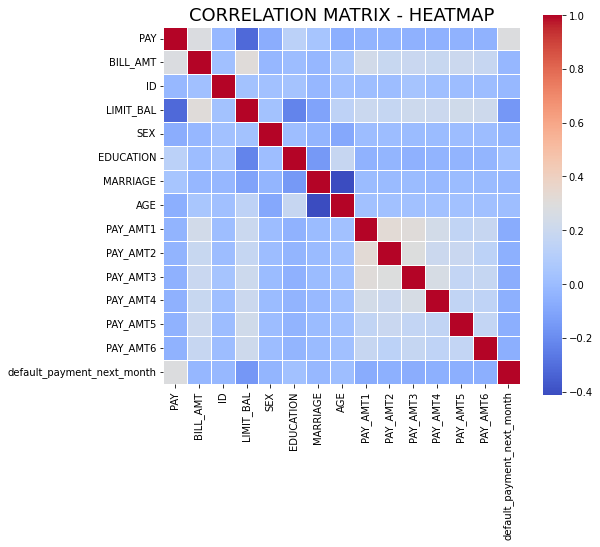

time: 321 ms (started: 2022-05-18 15:43:55 +05:30)


In [15]:
#Correlations matrix after merging columns
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [16]:
# Set 'category' type to categorical attributes
categorical = Train_data[[ 'MARRIAGE']]

# one-hot encoding
Train_data=pd.concat([
                pd.get_dummies(Train_data['MARRIAGE'], prefix='MARRIAGE'),
                Train_data],axis=1)
# drop original columns
Train_data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
Train_data.head()

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,0,1,0,-1.000000,8557.666667,25150,360000,2,2,25,12590,3479,3446,8870,2020,27043,0
1,0,0,1,0,0.000000,1107.333333,13470,240000,2,1,46,0,0,2240,0,2267,3074,0
2,0,1,0,0,0.000000,41459.666667,3092,320000,2,2,41,5000,2000,2000,3000,3000,1500,0
3,0,0,1,0,-1.666667,445.833333,13973,50000,2,2,24,0,0,0,0,0,0,1
4,0,1,0,0,-0.166667,22841.000000,10567,80000,1,3,52,1500,1500,1500,1028,876,1449,0


time: 21.3 ms (started: 2022-05-18 15:43:55 +05:30)


In [17]:
# Set 'category' type to categorical attributes
categorical = Test_data[[ 'MARRIAGE']]

# one-hot encoding
Test_data=pd.concat([
                pd.get_dummies(Test_data['MARRIAGE'], prefix='MARRIAGE'),
                Test_data],axis=1)
# drop original columns
Test_data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
Test_data.head()

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0.000000,38068.500000,10178,60000,2,2,30,1628,1618,1375,1403,1520,1205
1,0,0,1,0,0.333333,59440.333333,5304,200000,2,1,29,4160,14593,20150,0,5739,12050
2,0,0,1,0,-0.666667,16498.000000,5187,230000,1,1,39,2500,2000,0,0,0,0
3,0,0,1,0,0.000000,146072.166667,14495,150000,1,1,40,5800,5245,5200,5200,6500,7200
4,0,0,1,0,0.000000,77156.833333,20444,140000,1,2,27,10000,10000,3393,3260,5000,3000


time: 14.6 ms (started: 2022-05-18 15:43:55 +05:30)


In [18]:
#Ordinal Encoding on train data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Train_data["EDUCATION"])
le.transform(Train_data["EDUCATION"])
Train_data

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,0,1,0,-1.000000,8557.666667,25150,360000,2,2,25,12590,3479,3446,8870,2020,27043,0
1,0,0,1,0,0.000000,1107.333333,13470,240000,2,1,46,0,0,2240,0,2267,3074,0
2,0,1,0,0,0.000000,41459.666667,3092,320000,2,2,41,5000,2000,2000,3000,3000,1500,0
3,0,0,1,0,-1.666667,445.833333,13973,50000,2,2,24,0,0,0,0,0,0,1
4,0,1,0,0,-0.166667,22841.000000,10567,80000,1,3,52,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,0,1,0,-1.500000,0.000000,6283,50000,2,2,31,0,0,0,0,0,0,0
20996,0,1,0,0,0.000000,55198.500000,25589,80000,2,2,37,5000,3000,2000,4000,2000,2000,0
20997,0,1,0,0,1.166667,25024.000000,4378,100000,1,1,52,0,3600,0,6000,3000,0,1
20998,0,1,0,0,0.000000,28903.000000,8604,90000,2,2,47,2000,2000,2000,2000,2000,2000,0


time: 25.8 ms (started: 2022-05-18 15:43:55 +05:30)


In [19]:
#Ordinal Encoding on Test data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Test_data["EDUCATION"])
le.transform(Test_data["EDUCATION"])

array([1, 0, 0, ..., 1, 1, 1])

time: 17.4 ms (started: 2022-05-18 15:43:56 +05:30)


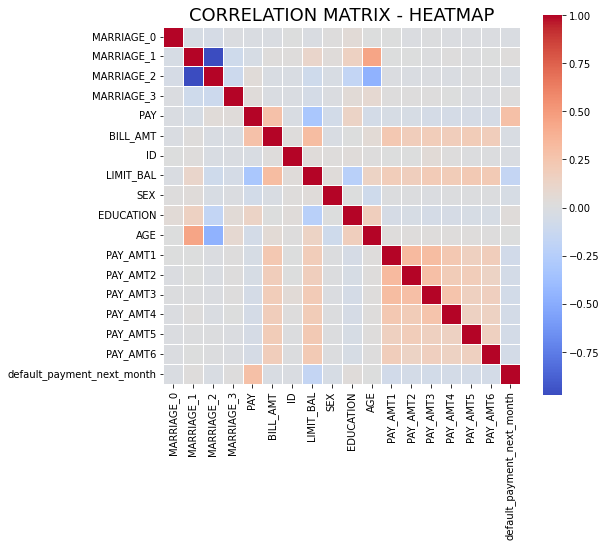

time: 376 ms (started: 2022-05-18 15:43:56 +05:30)


In [20]:
#Correlations matrix after merging columns
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## Model after merging columns

In [21]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 17) (21000,)
time: 5.51 ms (started: 2022-05-18 15:43:57 +05:30)


In [22]:
#Balancing the data using SMOTE and cleaning using ENN technique
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(sampling_strategy='minority', random_state=42)
X, y = sme.fit_resample(X, y)
print(X.shape, y.shape)

(18776, 17) (18776,)
time: 20.6 s (started: 2022-05-18 15:43:57 +05:30)


In [23]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14082, 17) (14082,)
(4694, 17) (4694,)
time: 5.14 ms (started: 2022-05-18 15:44:17 +05:30)


### Random Forest

In [24]:
#Fitting Random Forest classifier to the training set  
classifier_rf = RandomForestClassifier(criterion='entropy', max_depth=80 ,max_leaf_nodes=20,random_state=42,max_features=6)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features=6,
                       max_leaf_nodes=20, random_state=42)

time: 1.88 s (started: 2022-05-13 17:57:13 +05:30)


In [25]:
#Predicting the test set result 
y_predrf= classifier_rf.predict(X_test)  

time: 42 ms (started: 2022-05-13 17:57:15 +05:30)


In [26]:
#Predicting test data labels using probablity
y_predictp_RF= classifier_rf.predict_proba(X_test)[:,1]

time: 42.8 ms (started: 2022-05-13 17:57:16 +05:30)


In [27]:
#ROC Score of test data using probablity
print("ROC Score:",roc_auc_score(y_test, y_predictp_RF) )

ROC Score: 0.9078380063628361
time: 13 ms (started: 2022-05-13 17:57:18 +05:30)


In [30]:
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 1.94 ms (started: 2022-05-13 17:53:03 +05:30)


In [ ]:
Test_Label['default_payment_next_month'] = y_predrf
Test_Label.to_csv("Test_Label_RF.csv")

In [28]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predrf))
print("Testing Accuracy score:",accuracy_score(y_test, y_predrf))
print("ROC Score:",roc_auc_score(y_test, y_predrf) )
print(classification_report(y_test,y_predrf))

[[1376  398]
 [ 367 2553]]
Testing Accuracy score: 0.8370259906263315
ROC Score: 0.8249816605148955
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1774
           1       0.87      0.87      0.87      2920

    accuracy                           0.84      4694
   macro avg       0.83      0.82      0.83      4694
weighted avg       0.84      0.84      0.84      4694

time: 14 ms (started: 2022-05-13 17:57:20 +05:30)


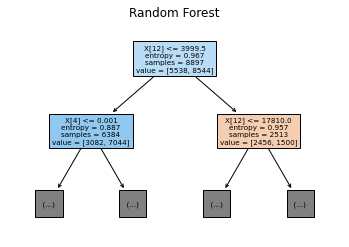

time: 266 ms (started: 2022-05-13 17:57:21 +05:30)


In [29]:
#Plotting Random Forest
plt.figure()
plot_tree(classifier_rf.estimators_[0], filled=True, max_depth=1)
plt.title("Random Forest")
plt.show()

In [30]:
#Creating DataFrame
report = classification_report(y_test,y_predrf, output_dict=True)
df_RF = pd.DataFrame(report).T

time: 27.5 ms (started: 2022-05-13 17:57:23 +05:30)


In [31]:
#Resetting & renaming index
df_RF.reset_index(level=0, inplace=True)
df_RF.rename({'index': 'Random Forest Classifier'}, axis=1, inplace=True)
df_RF

,Random Forest Classifier,precision,recall,f1-score,support
0,0,0.789443,0.775648,0.782485,1774.000000
1,1,0.865130,0.874315,0.869699,2920.000000
2,accuracy,0.837026,0.837026,0.837026,0.837026
3,macro avg,0.827287,0.824982,0.826092,4694.000000
4,weighted avg,0.836526,0.837026,0.836738,4694.000000


time: 20 ms (started: 2022-05-13 17:57:23 +05:30)


### GBM

In [32]:
#Fitting Gradient Boosting classifier to the training set  
model_gbm= GradientBoostingClassifier(learning_rate=0.01,random_state=0,loss='exponential',init='zero',validation_fraction=0.05)
model_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init='zero', learning_rate=0.01, loss='exponential',
                           random_state=0, validation_fraction=0.05)

time: 3.48 s (started: 2022-05-13 17:57:25 +05:30)


In [33]:
#Predicting the test set result 
y_predict_GBM= model_gbm.predict(X_test)  

time: 15 ms (started: 2022-05-13 17:57:29 +05:30)


In [34]:
y_predictp_GBM= model_gbm.predict_proba(X_test)[:,1]

time: 11.6 ms (started: 2022-05-13 17:57:29 +05:30)


In [35]:
#ROC Score of test data using probablity
print("ROC Score:",roc_auc_score(y_test, y_predictp_GBM) )

ROC Score: 0.8884340589334527
time: 3.89 ms (started: 2022-05-13 17:57:30 +05:30)


In [ ]:
#Creating dataframe of predicted test data labels
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

In [ ]:
#Saving predicted labels to csv
Test_Label['default_payment_next_month'] = y_predict_GBM
Test_Label.to_csv("Test_Label_GBM1.csv")

In [36]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_GBM))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_GBM))
print("ROC Score:",roc_auc_score(y_test, y_predict_GBM) )
print(classification_report(y_test,y_predict_GBM))

[[1419  355]
 [ 555 2365]]
Testing Accuracy score: 0.8061354921175969
ROC Score: 0.8049093836388628
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1774
           1       0.87      0.81      0.84      2920

    accuracy                           0.81      4694
   macro avg       0.79      0.80      0.80      4694
weighted avg       0.81      0.81      0.81      4694

time: 13.8 ms (started: 2022-05-13 17:57:32 +05:30)


<AxesSubplot:>

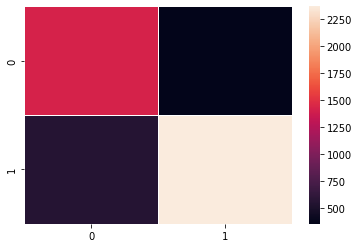

time: 144 ms (started: 2022-05-13 17:57:33 +05:30)


In [37]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_GBM)
sns.heatmap(cm,linewidths=1)

In [38]:
#Creating DataFrame
report = classification_report(y_test,y_predict_GBM, output_dict=True)
df_GBM = pd.DataFrame(report).T

time: 11.3 ms (started: 2022-05-13 17:57:34 +05:30)


In [39]:
#Resetting & renaming index
df_GBM.reset_index(level=0, inplace=True)
df_GBM.rename({'index': 'Gradient Boosting Classifier'}, axis=1, inplace=True)
df_GBM

,Gradient Boosting Classifier,precision,recall,f1-score,support
0,0,0.718845,0.799887,0.757204,1774.000000
1,1,0.869485,0.809932,0.838652,2920.000000
2,accuracy,0.806135,0.806135,0.806135,0.806135
3,macro avg,0.794165,0.804909,0.797928,4694.000000
4,weighted avg,0.812554,0.806135,0.807871,4694.000000


time: 7.52 ms (started: 2022-05-13 17:57:34 +05:30)


### XGBoost

In [40]:
#Fitting XGBoost classifier to the training set  
model_xgb=xgb.XGBClassifier(sampling_method= 'gradient_based', random_state=42,learning_rate=0.05,max_depth=3,base_score=0.1)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.1, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

time: 555 ms (started: 2022-05-13 17:57:36 +05:30)


In [41]:
#Predicting the test set result 
y_predict_xgb= model_xgb.predict(X_test)

time: 34.9 ms (started: 2022-05-13 17:57:38 +05:30)


In [42]:
y_predictp_XGB= model_xgb.predict_proba(X_test)[:,1]
#y_predict_xgb = np.round(y_predict_xgb)
#y_predict_xgbT = np.where(y_predict_xgbT>0.6, 1, 0)
#y_predict_xgb = np.argmax(y_predict_xgb, axis=1)
#df = pd.DataFrame(y_predict_xgbT)
#df

time: 33.2 ms (started: 2022-05-13 17:57:39 +05:30)


In [43]:
#ROC Score of Predict_proba
print("ROC Score:",roc_auc_score(y_test, y_predictp_XGB) )

ROC Score: 0.9280246637117575
time: 8.07 ms (started: 2022-05-13 17:57:40 +05:30)


In [47]:
#Creating dataframe of predicted labels of test data
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 8.56 ms (started: 2022-05-13 17:53:46 +05:30)


In [49]:
#Saving predicted labels to csv
Test_Label['default_payment_next_month'] = y_predictp_XGB
Test_Label.to_csv("Test_Label_XGB.csv")

time: 18.2 ms (started: 2022-05-13 17:53:58 +05:30)


In [44]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_xgb))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_xgb))
print("ROC Score:",roc_auc_score(y_test, y_predict_xgb) )
print(classification_report(y_test,y_predict_xgb))

[[1439  335]
 [ 354 2566]]
Testing Accuracy score: 0.8532168726033234
ROC Score: 0.8449641704375223
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1774
           1       0.88      0.88      0.88      2920

    accuracy                           0.85      4694
   macro avg       0.84      0.84      0.84      4694
weighted avg       0.85      0.85      0.85      4694

time: 12.7 ms (started: 2022-05-13 17:57:42 +05:30)


<AxesSubplot:>

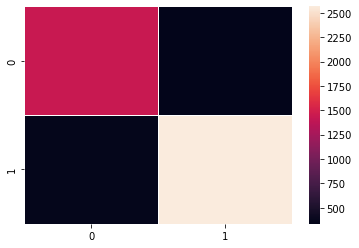

time: 135 ms (started: 2022-05-13 17:57:43 +05:30)


In [45]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_xgb)
sns.heatmap(cm,linewidths=1)

In [46]:
#Creating DataFrame
report = classification_report(y_test,y_predict_GBM, output_dict=True)
df_XGB = pd.DataFrame(report).T

time: 34.4 ms (started: 2022-05-13 17:57:43 +05:30)


In [47]:
#Resetting & renaming index
df_XGB.reset_index(level=0, inplace=True)
df_XGB.rename({'index': 'XGBoost Classifier'}, axis=1, inplace=True)
df_XGB

,XGBoost Classifier,precision,recall,f1-score,support
0,0,0.718845,0.799887,0.757204,1774.000000
1,1,0.869485,0.809932,0.838652,2920.000000
2,accuracy,0.806135,0.806135,0.806135,0.806135
3,macro avg,0.794165,0.804909,0.797928,4694.000000
4,weighted avg,0.812554,0.806135,0.807871,4694.000000


time: 19.9 ms (started: 2022-05-13 17:57:44 +05:30)


### Light GBM

In [48]:
#Fitting LGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=0,learning_rate=0.05,max_depth=3,boosting_type='gbdt')
model_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, max_depth=3, random_state=0)

time: 98.2 ms (started: 2022-05-13 17:57:45 +05:30)


In [49]:
#predicting the test results
y_predict_LGBM= model_lgbm.predict(X_test)  

time: 33.4 ms (started: 2022-05-13 17:57:46 +05:30)


In [50]:
#predicting model using probablity
y_predictp_LGBM= model_lgbm.predict_proba(X_test)[:,1]

time: 33.8 ms (started: 2022-05-13 17:57:48 +05:30)


In [51]:
#ROC Score of Predict_proba
print("ROC Score:",roc_auc_score(y_test, y_predictp_LGBM) )

ROC Score: 0.9291228127750923
time: 3.21 ms (started: 2022-05-13 17:57:49 +05:30)


In [58]:
#Creating Dataframe for predicted labels 
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 3.51 ms (started: 2022-05-13 17:54:06 +05:30)


In [61]:
#saving predicted labels to csv
Test_Label['default_payment_next_month'] = y_predictp_LGBM
Test_Label.to_csv("Test_Label_LGBM.csv")

time: 23.9 ms (started: 2022-05-13 17:54:30 +05:30)


In [52]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_LGBM))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_LGBM))
print("ROC Score:",roc_auc_score(y_test, y_predict_LGBM) )
print(classification_report(y_test,y_predict_LGBM))

[[1455  319]
 [ 356 2564]]
Testing Accuracy score: 0.856199403493822
ROC Score: 0.8491312875476826
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1774
           1       0.89      0.88      0.88      2920

    accuracy                           0.86      4694
   macro avg       0.85      0.85      0.85      4694
weighted avg       0.86      0.86      0.86      4694

time: 14.4 ms (started: 2022-05-13 17:57:50 +05:30)


<AxesSubplot:>

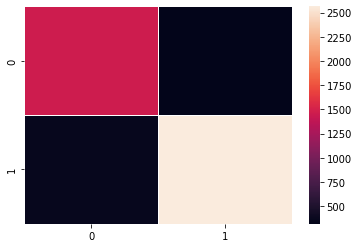

time: 116 ms (started: 2022-05-13 17:57:51 +05:30)


In [53]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_LGBM)
sns.heatmap(cm,linewidths=1)

In [54]:
#Creating DataFrame
report = classification_report(y_test,y_predict_LGBM, output_dict=True)
df_LGBM = pd.DataFrame(report).T

time: 24.6 ms (started: 2022-05-13 17:57:52 +05:30)


In [55]:
#Resetting & renaming index
df_LGBM.reset_index(level=0, inplace=True)
df_LGBM.rename({'index': 'Light GBM Classifier'}, axis=1, inplace=True)
df_LGBM

,Light GBM Classifier,precision,recall,f1-score,support
0,0,0.803424,0.820180,0.811715,1774.000000
1,1,0.889351,0.878082,0.883681,2920.000000
2,accuracy,0.856199,0.856199,0.856199,0.856199
3,macro avg,0.846387,0.849131,0.847698,4694.000000
4,weighted avg,0.856877,0.856199,0.856483,4694.000000


time: 20 ms (started: 2022-05-13 17:57:53 +05:30)


### CatBoost

In [56]:
#Fitting CatBoost Classifier
model_cb=CatBoostClassifier(iterations=5,learning_rate=0.01)
model_cb.fit(X_train,y_train)

0:	learn: 0.6883247	total: 56.5ms	remaining: 226ms
1:	learn: 0.6835295	total: 63ms	remaining: 94.5ms
2:	learn: 0.6794187	total: 69.7ms	remaining: 46.4ms
3:	learn: 0.6747338	total: 75.5ms	remaining: 18.9ms
4:	learn: 0.6701760	total: 79.8ms	remaining: 0us


time: 421 ms (started: 2022-05-13 17:57:54 +05:30)


In [57]:
#Predicting the model
y_predict_CB= model_cb.predict(X_test)

time: 2.92 ms (started: 2022-05-13 17:57:55 +05:30)


In [58]:
#predicting the test data using probablity
y_predictp_CB= model_cb.predict_proba(X_test)[:,1]

time: 3.33 ms (started: 2022-05-13 17:57:57 +05:30)


In [59]:
#ROC Score using test data probablity
print("ROC Score:",roc_auc_score(y_test, y_predictp_CB))

ROC Score: 0.9045266675418141
time: 3.25 ms (started: 2022-05-13 17:57:58 +05:30)


In [ ]:
#Creating DataFrame for predicted labels of test data
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

In [ ]:
#saving predicted labels to csv
Test_Label['default_payment_next_month'] = y_predict_CBt
Test_Label.to_csv("Test_Label_CB.csv")

In [60]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_CB))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_CB))
print("ROC Score:",roc_auc_score(y_test, y_predict_CB) )
print(classification_report(y_test,y_predict_CB))

[[1380  394]
 [ 371 2549]]
Testing Accuracy score: 0.8370259906263315
ROC Score: 0.8254241247239426
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1774
           1       0.87      0.87      0.87      2920

    accuracy                           0.84      4694
   macro avg       0.83      0.83      0.83      4694
weighted avg       0.84      0.84      0.84      4694

time: 16.3 ms (started: 2022-05-13 17:57:59 +05:30)


<AxesSubplot:>

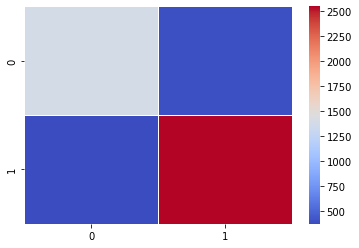

time: 143 ms (started: 2022-05-13 17:58:00 +05:30)


In [61]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_CB)
sns.heatmap(cm,linewidths=1,cmap='coolwarm')

In [62]:
#Creating DataFrame
report = classification_report(y_test,y_predict_CB, output_dict=True)
df_CB = pd.DataFrame(report).T

time: 10.4 ms (started: 2022-05-13 17:58:02 +05:30)


In [63]:
#Resetting & renaming index
df_CB.reset_index(level=0, inplace=True)
df_CB.rename({'index': 'CatBoost Classifier'}, axis=1, inplace=True)
df_CB

,CatBoost Classifier,precision,recall,f1-score,support
0,0,0.788121,0.777903,0.782979,1774.000000
1,1,0.866123,0.872945,0.869521,2920.000000
2,accuracy,0.837026,0.837026,0.837026,0.837026
3,macro avg,0.827122,0.825424,0.826250,4694.000000
4,weighted avg,0.836644,0.837026,0.836814,4694.000000


time: 7 ms (started: 2022-05-13 17:58:02 +05:30)


### AdaBoost

In [64]:
#Fitting AdaBoost Classifier
model_ab = AdaBoostClassifier(learning_rate=0.1,random_state=0)
model_ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=0)

time: 791 ms (started: 2022-05-13 17:58:11 +05:30)


In [65]:
#predicting the model
y_predict_AB= model_ab.predict(X_test)  

time: 45.3 ms (started: 2022-05-13 17:58:13 +05:30)


In [66]:
#Predicting test data using probablity
y_predictp_AB= model_ab.predict_proba(X_test)[:,1]

time: 40.9 ms (started: 2022-05-13 17:58:14 +05:30)


In [67]:
#ROC Score using probablity
print("ROC Score:",roc_auc_score(y_test, y_predictp_AB) )

ROC Score: 0.8928239525258297
time: 2.57 ms (started: 2022-05-13 17:58:15 +05:30)


In [190]:
#Creating new dataframe for predicted test data
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 8.58 ms (started: 2022-05-13 16:31:00 +05:30)


In [191]:
#saving predicted labels csv
Test_Label['default_payment_next_month'] = y_predictp_AB
Test_Label.to_csv("Test_Label_AB.csv")

time: 37 ms (started: 2022-05-13 16:31:15 +05:30)


In [68]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_AB))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_AB))
print("ROC Score:",roc_auc_score(y_test, y_predict_AB) )
print(classification_report(y_test,y_predict_AB))

[[1385  389]
 [ 420 2500]]
Testing Accuracy score: 0.8276523221133362
ROC Score: 0.8184429584099088
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1774
           1       0.87      0.86      0.86      2920

    accuracy                           0.83      4694
   macro avg       0.82      0.82      0.82      4694
weighted avg       0.83      0.83      0.83      4694

time: 13.4 ms (started: 2022-05-13 17:58:16 +05:30)


<AxesSubplot:>

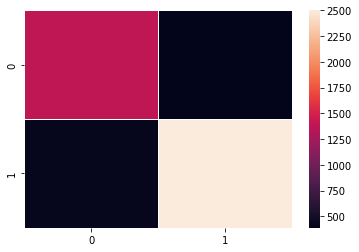

time: 118 ms (started: 2022-05-13 17:58:19 +05:30)


In [69]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_AB)
sns.heatmap(cm,linewidths=1)

In [70]:
#Creating DataFrame
report = classification_report(y_test,y_predict_AB, output_dict=True)
df_AB = pd.DataFrame(report).T

time: 26.8 ms (started: 2022-05-13 17:58:20 +05:30)


In [71]:
#Resetting & renaming index
df_AB.reset_index(level=0, inplace=True)
df_AB.rename({'index': 'AdaBoost Classifier'}, axis=1, inplace=True)
df_AB

,AdaBoost Classifier,precision,recall,f1-score,support
0,0,0.767313,0.780722,0.773959,1774.000000
1,1,0.865351,0.856164,0.860733,2920.000000
2,accuracy,0.827652,0.827652,0.827652,0.827652
3,macro avg,0.816332,0.818443,0.817346,4694.000000
4,weighted avg,0.828300,0.827652,0.827939,4694.000000


time: 7.13 ms (started: 2022-05-13 17:58:21 +05:30)


## ROC Curve for all models

In [72]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predictp_RF, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_predictp_GBM, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predictp_XGB, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_predictp_LGBM, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test,y_predictp_CB, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_predictp_AB, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


time: 8.64 ms (started: 2022-05-13 17:58:23 +05:30)


RF -  0.9078380063628361
GBM -  0.8884340589334527
XGB -  0.9280246637117575
LGBM -  0.9291228127750923
CB -  0.9045266675418141
AB -  0.8928239525258297


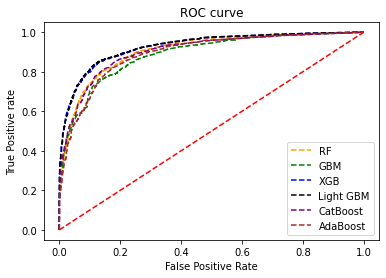

time: 350 ms (started: 2022-05-13 17:58:25 +05:30)


In [73]:
# ploting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RF')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='GBM')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='XGB')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Light GBM')
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label='CatBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='AdaBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
([print("RF - ", roc_auc_score(y_test, y_predictp_RF)),
print("GBM - ", roc_auc_score(y_test, y_predictp_GBM)),
print("XGB - ", roc_auc_score(y_test, y_predictp_XGB)),
print("LGBM - ", roc_auc_score(y_test, y_predictp_LGBM)),
print("CB - ",roc_auc_score(y_test,y_predictp_CB)),
print("AB - ", roc_auc_score(y_test, y_predictp_AB))])
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Feature importance of best model

In [74]:
# Saving all features in a list
feature_cols = X.columns.tolist() 

time: 289 µs (started: 2022-05-13 17:58:35 +05:30)


Text(0.5, 1.0, 'Features importance')

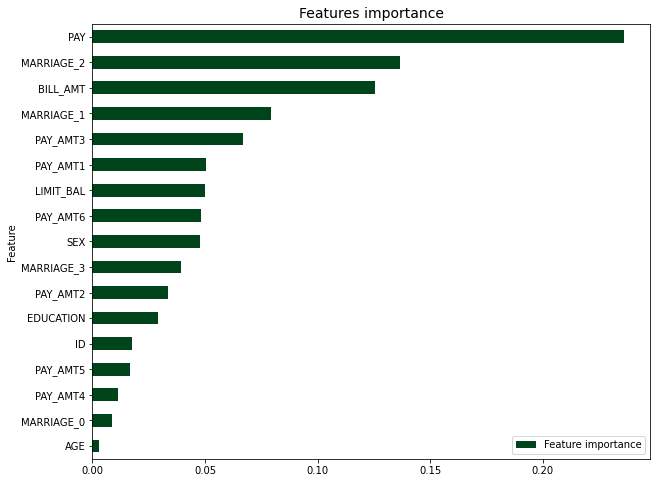

time: 175 ms (started: 2022-05-13 17:58:36 +05:30)


In [75]:
# Plot feature importance of highest ROC score - XGBoost

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': model_xgb.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax, cmap='PRGn_r')
plt.title('Features importance',fontsize=14)

In [76]:
def Accuracy_Model_score_Mergedcols():
    
    """
    printing Classification_Report DataFrames of all the models
    
    """
    
    print(df_AB)
    print(df_CB)
    print(df_LGBM)
    print(df_XGB)
    print(df_RF)
    print(df_GBM)
   

time: 438 µs (started: 2022-05-13 17:58:38 +05:30)


In [77]:
Accuracy_Model_score_Mergedcols()

  AdaBoost Classifier  precision    recall  f1-score      support
0                   0   0.767313  0.780722  0.773959  1774.000000
1                   1   0.865351  0.856164  0.860733  2920.000000
2            accuracy   0.827652  0.827652  0.827652     0.827652
3           macro avg   0.816332  0.818443  0.817346  4694.000000
4        weighted avg   0.828300  0.827652  0.827939  4694.000000
  CatBoost Classifier  precision    recall  f1-score      support
0                   0   0.788121  0.777903  0.782979  1774.000000
1                   1   0.866123  0.872945  0.869521  2920.000000
2            accuracy   0.837026  0.837026  0.837026     0.837026
3           macro avg   0.827122  0.825424  0.826250  4694.000000
4        weighted avg   0.836644  0.837026  0.836814  4694.000000
  Light GBM Classifier  precision    recall  f1-score      support
0                    0   0.803424  0.820180  0.811715  1774.000000
1                    1   0.889351  0.878082  0.883681  2920.000000
2      

In [24]:
clfs= []
cols=[]
def Sub_Trees():
    
    """
    
    Returns Random Forest Model using Decision Tree Model
    
    """
    # splitting the X_train
    rs = ShuffleSplit(n_splits=15, test_size=0.25, random_state=42)
    rs.get_n_splits(X_train)
    #print(rs)

    X_subsets = dict()
    y_subsets = dict()

    XT_subset= dict()
    yT_subset= dict()

    for i, indexes in enumerate(rs.split(X_train)):
        #print(i)
        X_subsets[i] = X_train.iloc[indexes[0], :]
        y_subsets[i] = y_train.iloc[indexes[0]]

    for j, indexes in enumerate(rs.split(X_test)):
        XT_subset[j] = X_test.iloc[indexes[0], :]
        yT_subset[j] = y_test.iloc[indexes[0]]
    
    
    # Creating Random Forest Model
    scores = []
    for subset in range(0, 15):
        clf = DecisionTreeClassifier(random_state=42)
        features = np.random.choice(X_train.columns,14,replace=False)
        #col= np.random.choice(list(range(X_test.shape[1])),14,replace=True)
        #print(features)
        #fitting the model
        clf.fit(X_subsets[subset].loc[:,features], y_subsets[subset])
        # make predictions
        y_pred = clf.predict(XT_subset[subset].loc[:,features])
        # evaluate accuracy and store
        scores.append(accuracy_score(yT_subset[subset], y_pred))
        clfs.append(clf)
        cols.append(features)
        print("Accuracy of {} Decision Tree :- ".format(subset))
        print("Accuracy: {:.2f}%.".format(accuracy_score(yT_subset[subset], y_pred)))
        print("Average Accuracy: {:.2f}%.".format(np.mean(scores) * 100))
        print("f1_score: {:.2f}%.".format(f1_score(yT_subset[subset], y_pred)))
        print("ROC Score: {:.2f}%.".format(roc_auc_score(yT_subset[subset], y_pred)))

time: 3.05 ms (started: 2022-05-18 15:44:32 +05:30)


In [25]:
Sub_Trees()

Accuracy of 0 Decision Tree :- 
Accuracy: 0.83%.
Average Accuracy: 83.35%.
f1_score: 0.87%.
ROC Score: 0.82%.
Accuracy of 1 Decision Tree :- 
Accuracy: 0.82%.
Average Accuracy: 82.73%.
f1_score: 0.86%.
ROC Score: 0.81%.
Accuracy of 2 Decision Tree :- 
Accuracy: 0.83%.
Average Accuracy: 82.91%.
f1_score: 0.87%.
ROC Score: 0.82%.
Accuracy of 3 Decision Tree :- 
Accuracy: 0.83%.
Average Accuracy: 82.94%.
f1_score: 0.86%.
ROC Score: 0.82%.
Accuracy of 4 Decision Tree :- 
Accuracy: 0.82%.
Average Accuracy: 82.75%.
f1_score: 0.86%.
ROC Score: 0.81%.
Accuracy of 5 Decision Tree :- 
Accuracy: 0.81%.
Average Accuracy: 82.39%.
f1_score: 0.84%.
ROC Score: 0.80%.
Accuracy of 6 Decision Tree :- 
Accuracy: 0.81%.
Average Accuracy: 82.14%.
f1_score: 0.84%.
ROC Score: 0.79%.
Accuracy of 7 Decision Tree :- 
Accuracy: 0.80%.
Average Accuracy: 81.91%.
f1_score: 0.84%.
ROC Score: 0.79%.
Accuracy of 8 Decision Tree :- 
Accuracy: 0.82%.
Average Accuracy: 81.93%.
f1_score: 0.86%.
ROC Score: 0.81%.
Accuracy o

In [26]:
#Single instance function
def Predict_Row(instance):
    """
    returns prection for single row
    
    """
    predictions = []
    for i in range(len(clfs)):
        
        predictions.append(clfs[i].predict(instance[cols[i]]))
        
    y_pred = stats.mode(np.array(predictions), axis=None)[0][0]
    print("prediction of the instance: [{}]".format(y_pred))

time: 4.37 ms (started: 2022-05-18 15:45:26 +05:30)


In [27]:
Predict_Row(X_test.iloc[1:2])

prediction of the instance: [1]
time: 45.4 ms (started: 2022-05-18 15:45:27 +05:30)


In [70]:
#Building Random Forest Model
def Random_Forest_Model():
    predict_clf = []
    for j in range(len(clfs)):  
        predict_clf.append(clfs[j].predict(X_test.loc[:,cols[j]]))
    y_predict = stats.mode(np.array(predict_clf), axis=0)[0][0]
    print("prediction of the Model:{}".format(y_predict))
    print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_predict) * 100))
    print("f1_score: {:.2f}%.".format(f1_score(y_test, y_predict)))
    print("ROC Score: {:.2f}%.".format(roc_auc_score(y_test, y_predict)))
    

time: 1.91 ms (started: 2022-05-18 16:06:35 +05:30)


In [71]:
Random_Forest_Model()

prediction of the Model:[1 1 1 ... 1 1 1]
Accuracy on test set: 89.22%
f1_score: 0.91%.
ROC Score: 0.89%.
time: 163 ms (started: 2022-05-18 16:06:36 +05:30)
